In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/gdrive')


Mounted at /content/gdrive


# **Bank Customer Segmentation**

This dataset consists of 1 Million+ transaction by over 800K customers for a bank in India. The data contains information such as - customer age (DOB), location, gender, account balance at the time of the transaction, transaction details, transaction amount, etc.

Importing libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading the dataset

In [6]:
df=pd.read_csv('/content/gdrive/MyDrive/bank customer segmentation/bank_transactions.csv')


In [7]:
display(pd.DataFrame(df))

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


Basic understanding of data

In [8]:
df.shape

(1048567, 9)

In [9]:
df.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [11]:
df.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [12]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [13]:
df[df.duplicated()]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)


Feature engineering

In [14]:
df.drop(['TransactionID','CustomerID'],axis=1,inplace=True)

In [15]:
df['CustGender'].value_counts()

M    765530
F    281936
T         1
Name: CustGender, dtype: int64

In [16]:
df.drop(df[df['CustGender'].isin(['T'])].index,axis=0,inplace=True)

In [17]:
df['CustGender'].unique()

array(['F', 'M', nan], dtype=object)

In [18]:
from datetime import date
df = df[~df['CustomerDOB'].isna()]
df.CustomerDOB = pd.to_datetime(df.CustomerDOB,errors='coerce')

In [19]:
def age(birthdate):
    today = date.today()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

In [20]:
df['Age'] = df.CustomerDOB.apply(age)

In [21]:
df = df[df['Age']>0]
df.drop('CustomerDOB',axis=1,inplace=True)
df.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(970106, 7)

In [22]:
for col in df.columns:
    print("Percentage of null values of {}:".format(col),str(np.round(df[col].isna().sum()/len(df)*100,2)) + '%')

Percentage of null values of CustGender: 0.09%
Percentage of null values of CustLocation: 0.02%
Percentage of null values of CustAccountBalance: 0.23%
Percentage of null values of TransactionDate: 0.0%
Percentage of null values of TransactionTime: 0.0%
Percentage of null values of TransactionAmount (INR): 0.0%
Percentage of null values of Age: 0.0%


In [23]:
for col in df.columns:
    print("Percentage of unique values of {}:".format(col),str(np.round(df[col].nunique()/len(df)*100,2)) + '%')

Percentage of unique values of CustGender: 0.0%
Percentage of unique values of CustLocation: 0.91%
Percentage of unique values of CustAccountBalance: 15.07%
Percentage of unique values of TransactionDate: 0.01%
Percentage of unique values of TransactionTime: 8.39%
Percentage of unique values of TransactionAmount (INR): 8.72%
Percentage of unique values of Age: 0.01%


In [24]:
df = df[~df['CustGender'].isna()]

In [25]:
df = df[~df['CustLocation'].isna()]

In [26]:
 df.CustAccountBalance = df.CustAccountBalance.fillna(df.groupby('CustLocation')['CustAccountBalance'].transform('mean'))

In [27]:
df = df[~df.CustAccountBalance.isna()]

In [28]:
df.isna().sum()

CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
Age                        0
dtype: int64

In [29]:
df.shape

(968909, 7)

In [30]:
df.TransactionDate = pd.to_datetime(df.TransactionDate,errors='coerce')

In [31]:
df['TransactionMonth'] = df.TransactionDate.dt.month
df['TransactionMonthName'] = df.TransactionDate.dt.month_name()
df['TransactionDay'] = df.TransactionDate.dt.day
df['TransactionDayName'] = df.TransactionDate.dt.day_name()

In [32]:
df.drop('TransactionDate',axis=1,inplace=True)

Exploratory Data Analysis(EDA)

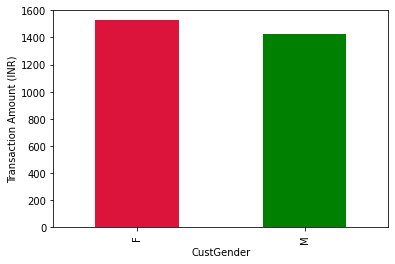

In [33]:
ax = df.groupby('CustGender')['TransactionAmount (INR)'].mean().plot(kind='bar',color=['crimson','green'])
plt.ylabel('Transaction Amount (INR)');

At an average, females make slightly higher transactions than males.

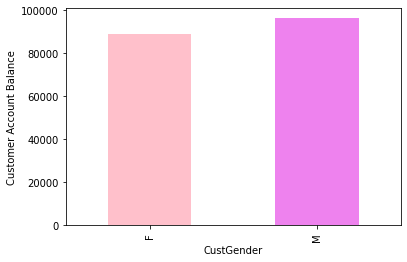

In [34]:
ax = df.groupby('CustGender')['CustAccountBalance'].mean().plot(kind='bar',color=['pink','violet'])
plt.ylabel('Customer Account Balance');

At an average, male customers have marginally higher account balances in comparison to their female counterparts.

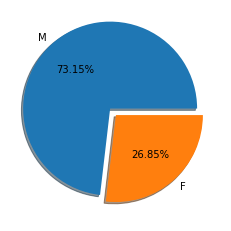

In [35]:
labels = df.CustGender.value_counts().keys()
values = df.CustGender.value_counts().values
explode = (0.1,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%');

A significant proportion of bank customers are males accounting for about 73% of the total share.

# **## Monthly comparison of spending Habits of Male and Female Customers**


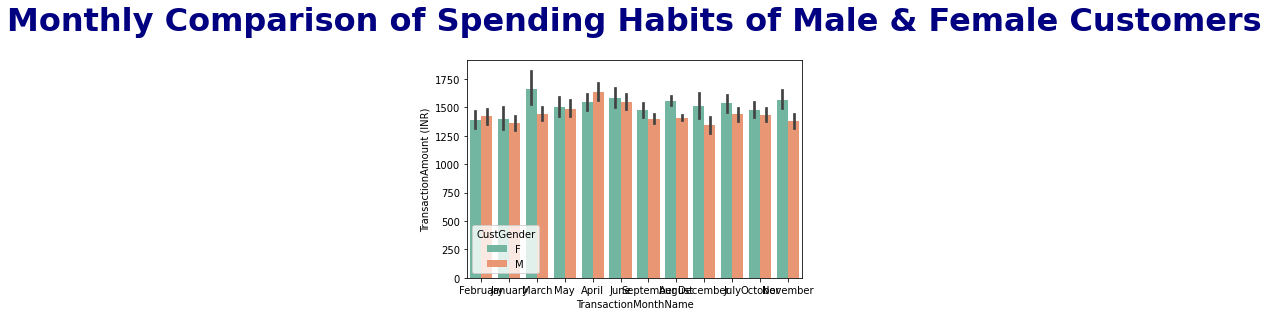

In [36]:
sns.barplot(data=df,x='TransactionMonthName',y='TransactionAmount (INR)',palette='Set2',hue='CustGender')
plt.title('Monthly Comparison of Spending Habits of Male & Female Customers',fontsize=32,fontweight='bold',color='navy',pad=30);

Male customers make higher transactions than their female counterparts only during the months of February and April. In all the remaining months, female customers perform greater transactions. Therefore, the bank must provide more special offers and incentives to female customers as they are likely to be substantially active in making larger transactions almost throughout the entire year.

Higher value transactions are mostly done during the months of March, April and June.

# **Weekday-wise comparison of spending Habits of Male and Female Customers**

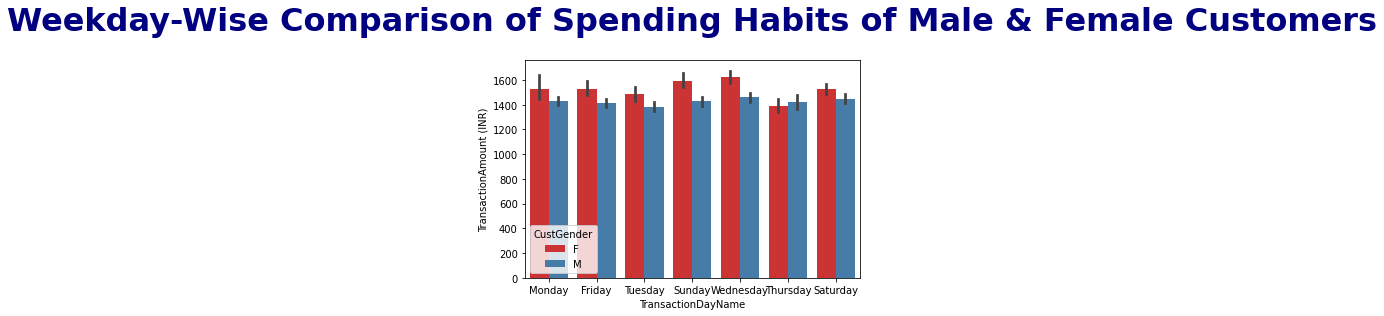

In [37]:
sns.barplot(data=df,x='TransactionDayName',y='TransactionAmount (INR)',palette='Set1',hue='CustGender')
plt.title('Weekday-Wise Comparison of Spending Habits of Male & Female Customers',fontsize=32,fontweight='bold',color='navy',pad=30);

Female customers perform higher transactions than their male counterparts in almost every week day.

# **Monthly comparisson of Account Balance of Male and Female customers**

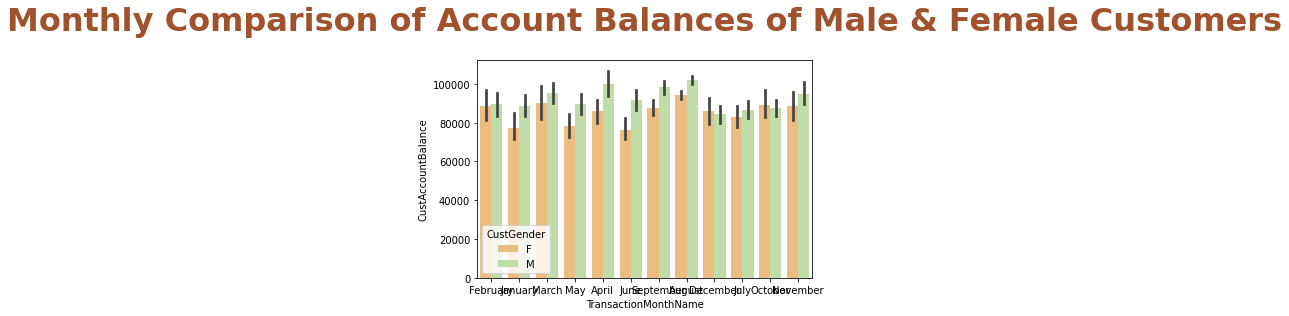

In [38]:
sns.barplot(data=df,x='TransactionMonthName',y='CustAccountBalance',palette='Spectral',hue='CustGender')
plt.title('Monthly Comparison of Account Balances of Male & Female Customers',fontsize=32,fontweight='bold',color='sienna',pad=30);

Male customers predominantly have greater account balances as compared to their female counterparts. This is evident from the fact that they generally make comparatively low value transactions than female customers.

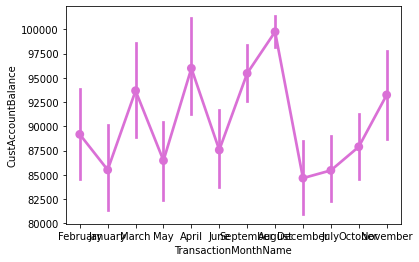

In [39]:
sns.pointplot(data=df,x='TransactionMonthName',y='CustAccountBalance',color='orchid')

Commonly, the account balances of customers are highest in the months of August and September whereas they are lowest in the months of July and December. In the festive months, the customer account balances drop significantly which makes sense as people usually expend more money during the festive season.

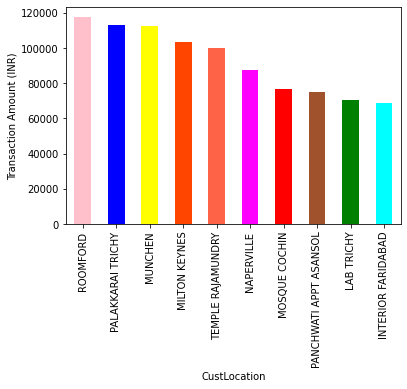

In [40]:
df.groupby('CustLocation')['TransactionAmount (INR)'].mean().sort_values(ascending=False)[:10].plot(kind='bar',color=['pink','blue','yellow','orangered','tomato','magenta','red','sienna','green','cyan'])
plt.ylabel('Transaction Amount (INR)');

Customers belonging to the Roomford bank branch in United Kingdom mostly perform the highest transactions which are closely followed by the bank branches in Palakkarai Trichy(Tamil Nadu, India) and Munchen in Germany.

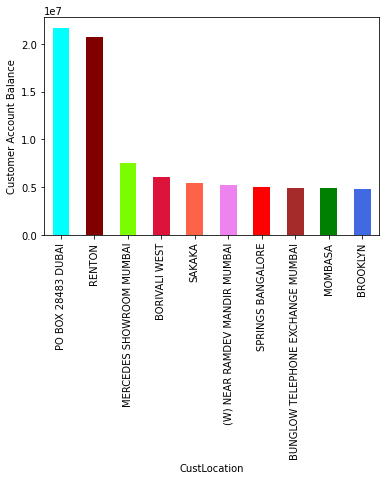

In [41]:
df.groupby('CustLocation')['CustAccountBalance'].mean().sort_values(ascending=False)[:10].plot(kind='bar',color=['aqua','maroon','lawngreen','crimson','tomato','violet','red','brown','green','royalblue'])
plt.ylabel('Customer Account Balance');

Customers living in PO Box 28483 Dubai bank branch have the highest account balances among all customers.

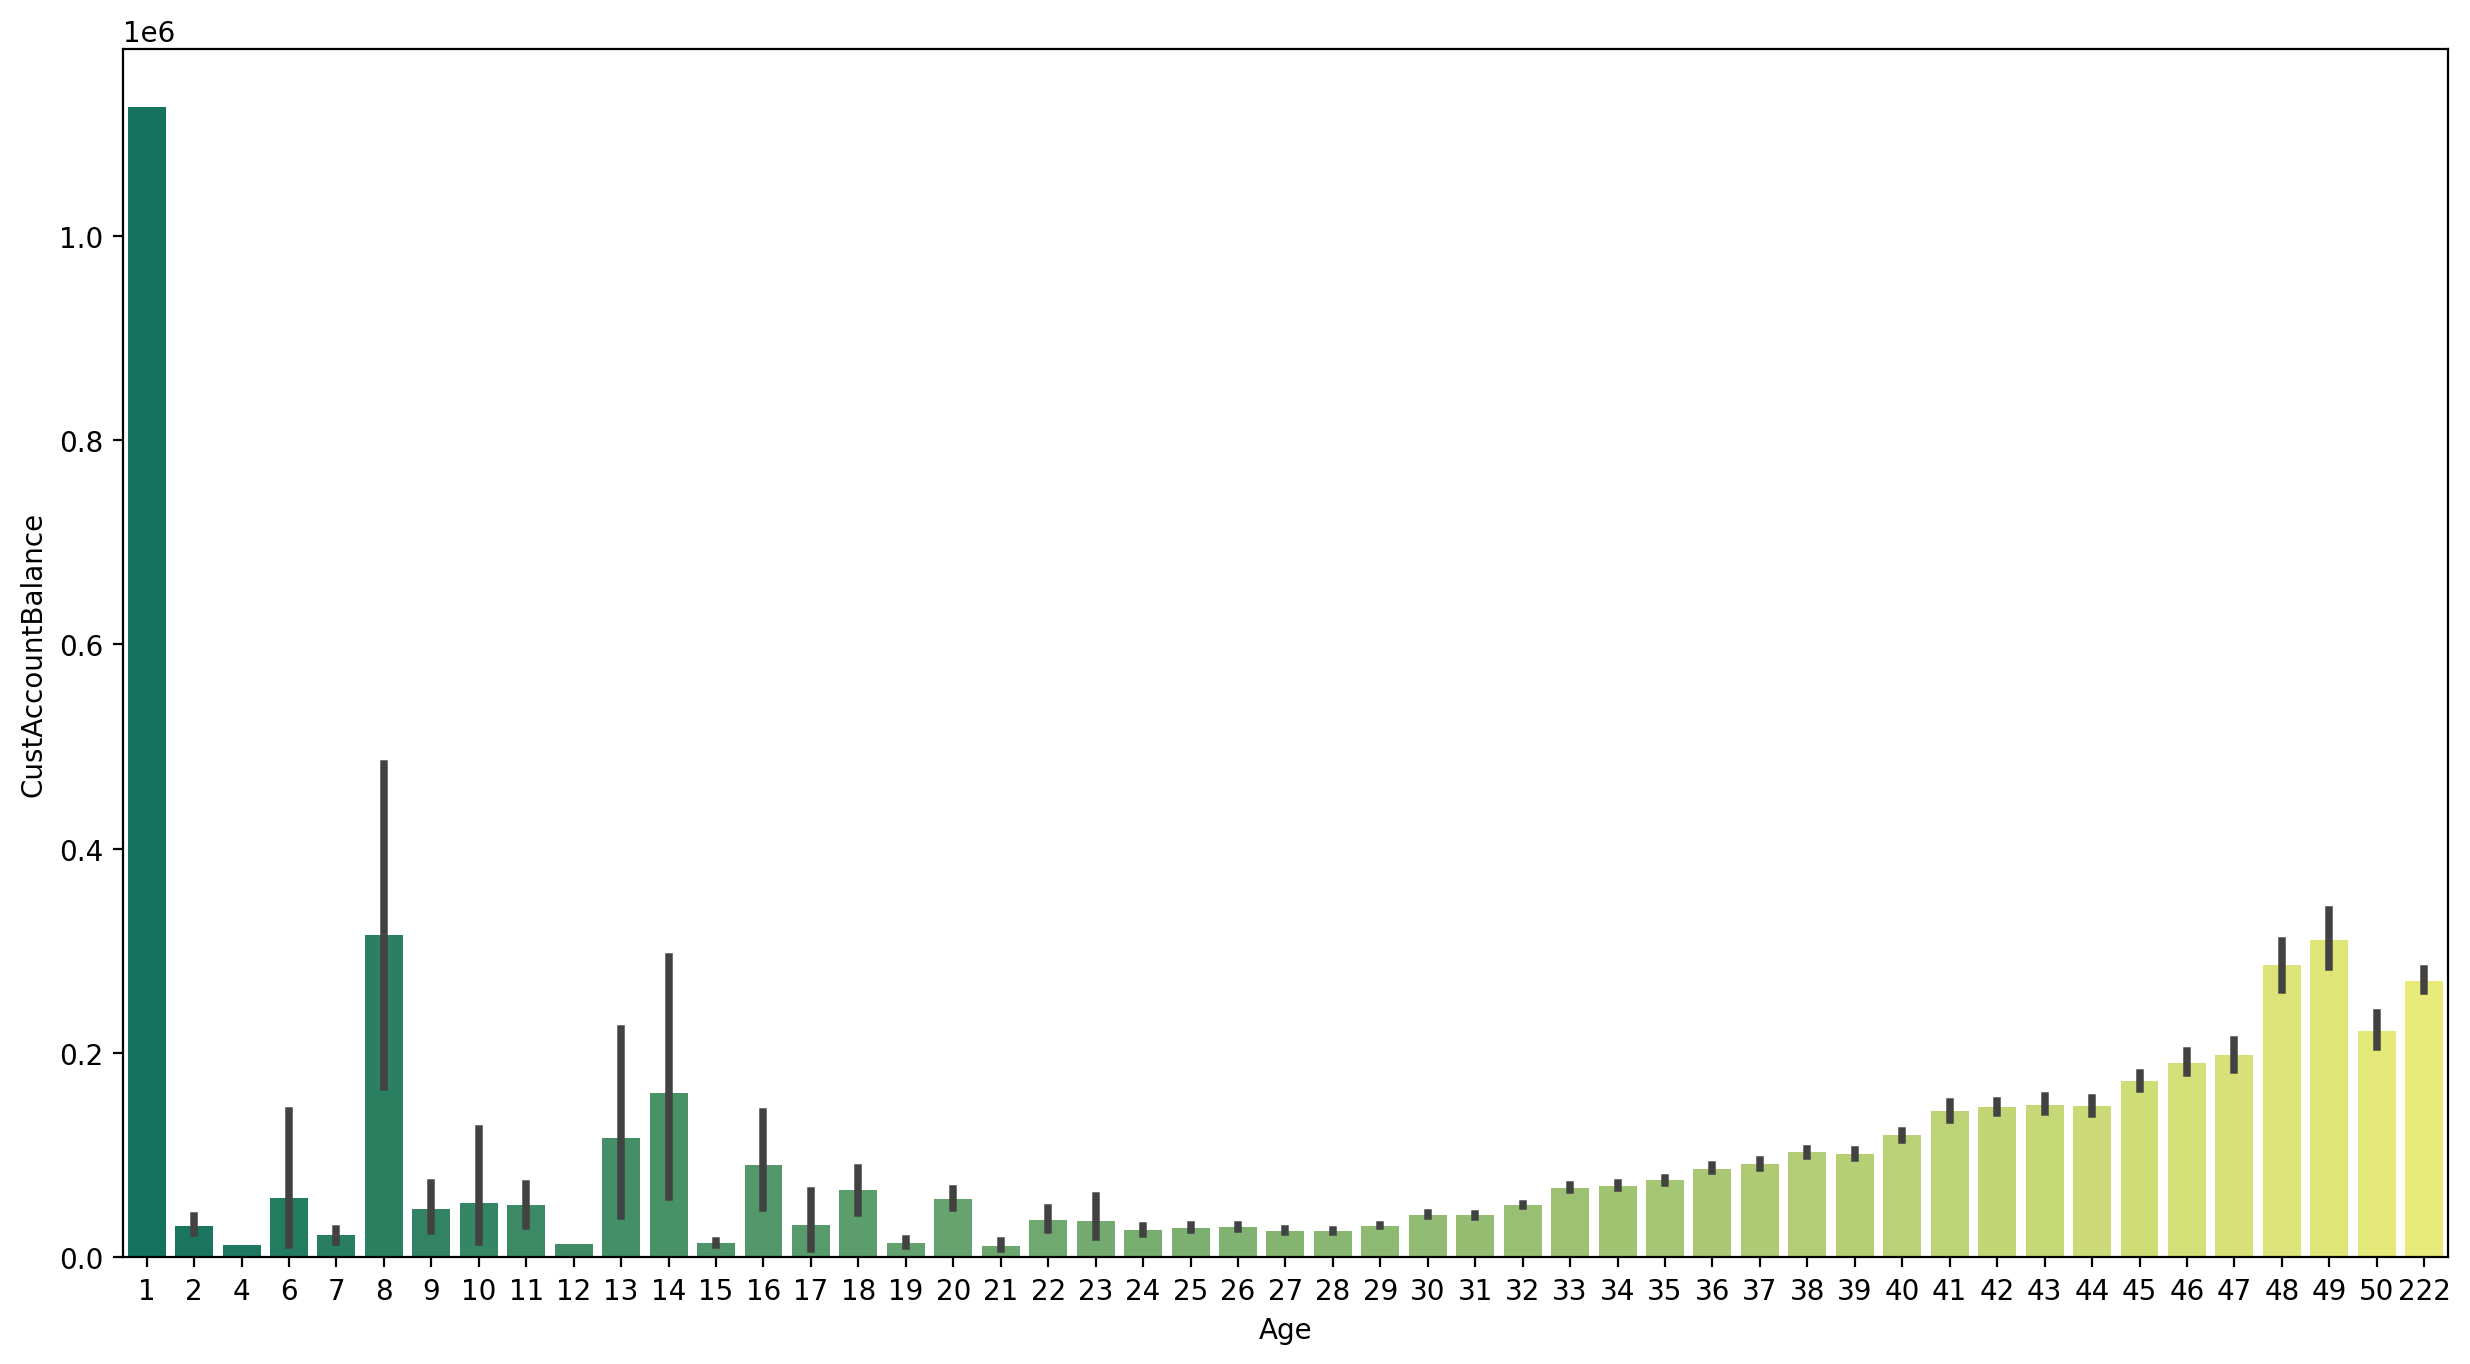

In [42]:
plt.figure(figsize=(15,8),dpi=200)
sns.barplot(data=df,x='Age',y='CustAccountBalance',palette='summer')

In general, the account balances of customers rise abruptly with increase in their ages, attaining a peak by the old age of 50 years or more, although there are a few excepions to this matter. The account balances of younger adults in the age range of 19 to 22 years have higher account balances in comparison to their surrounding age groups.

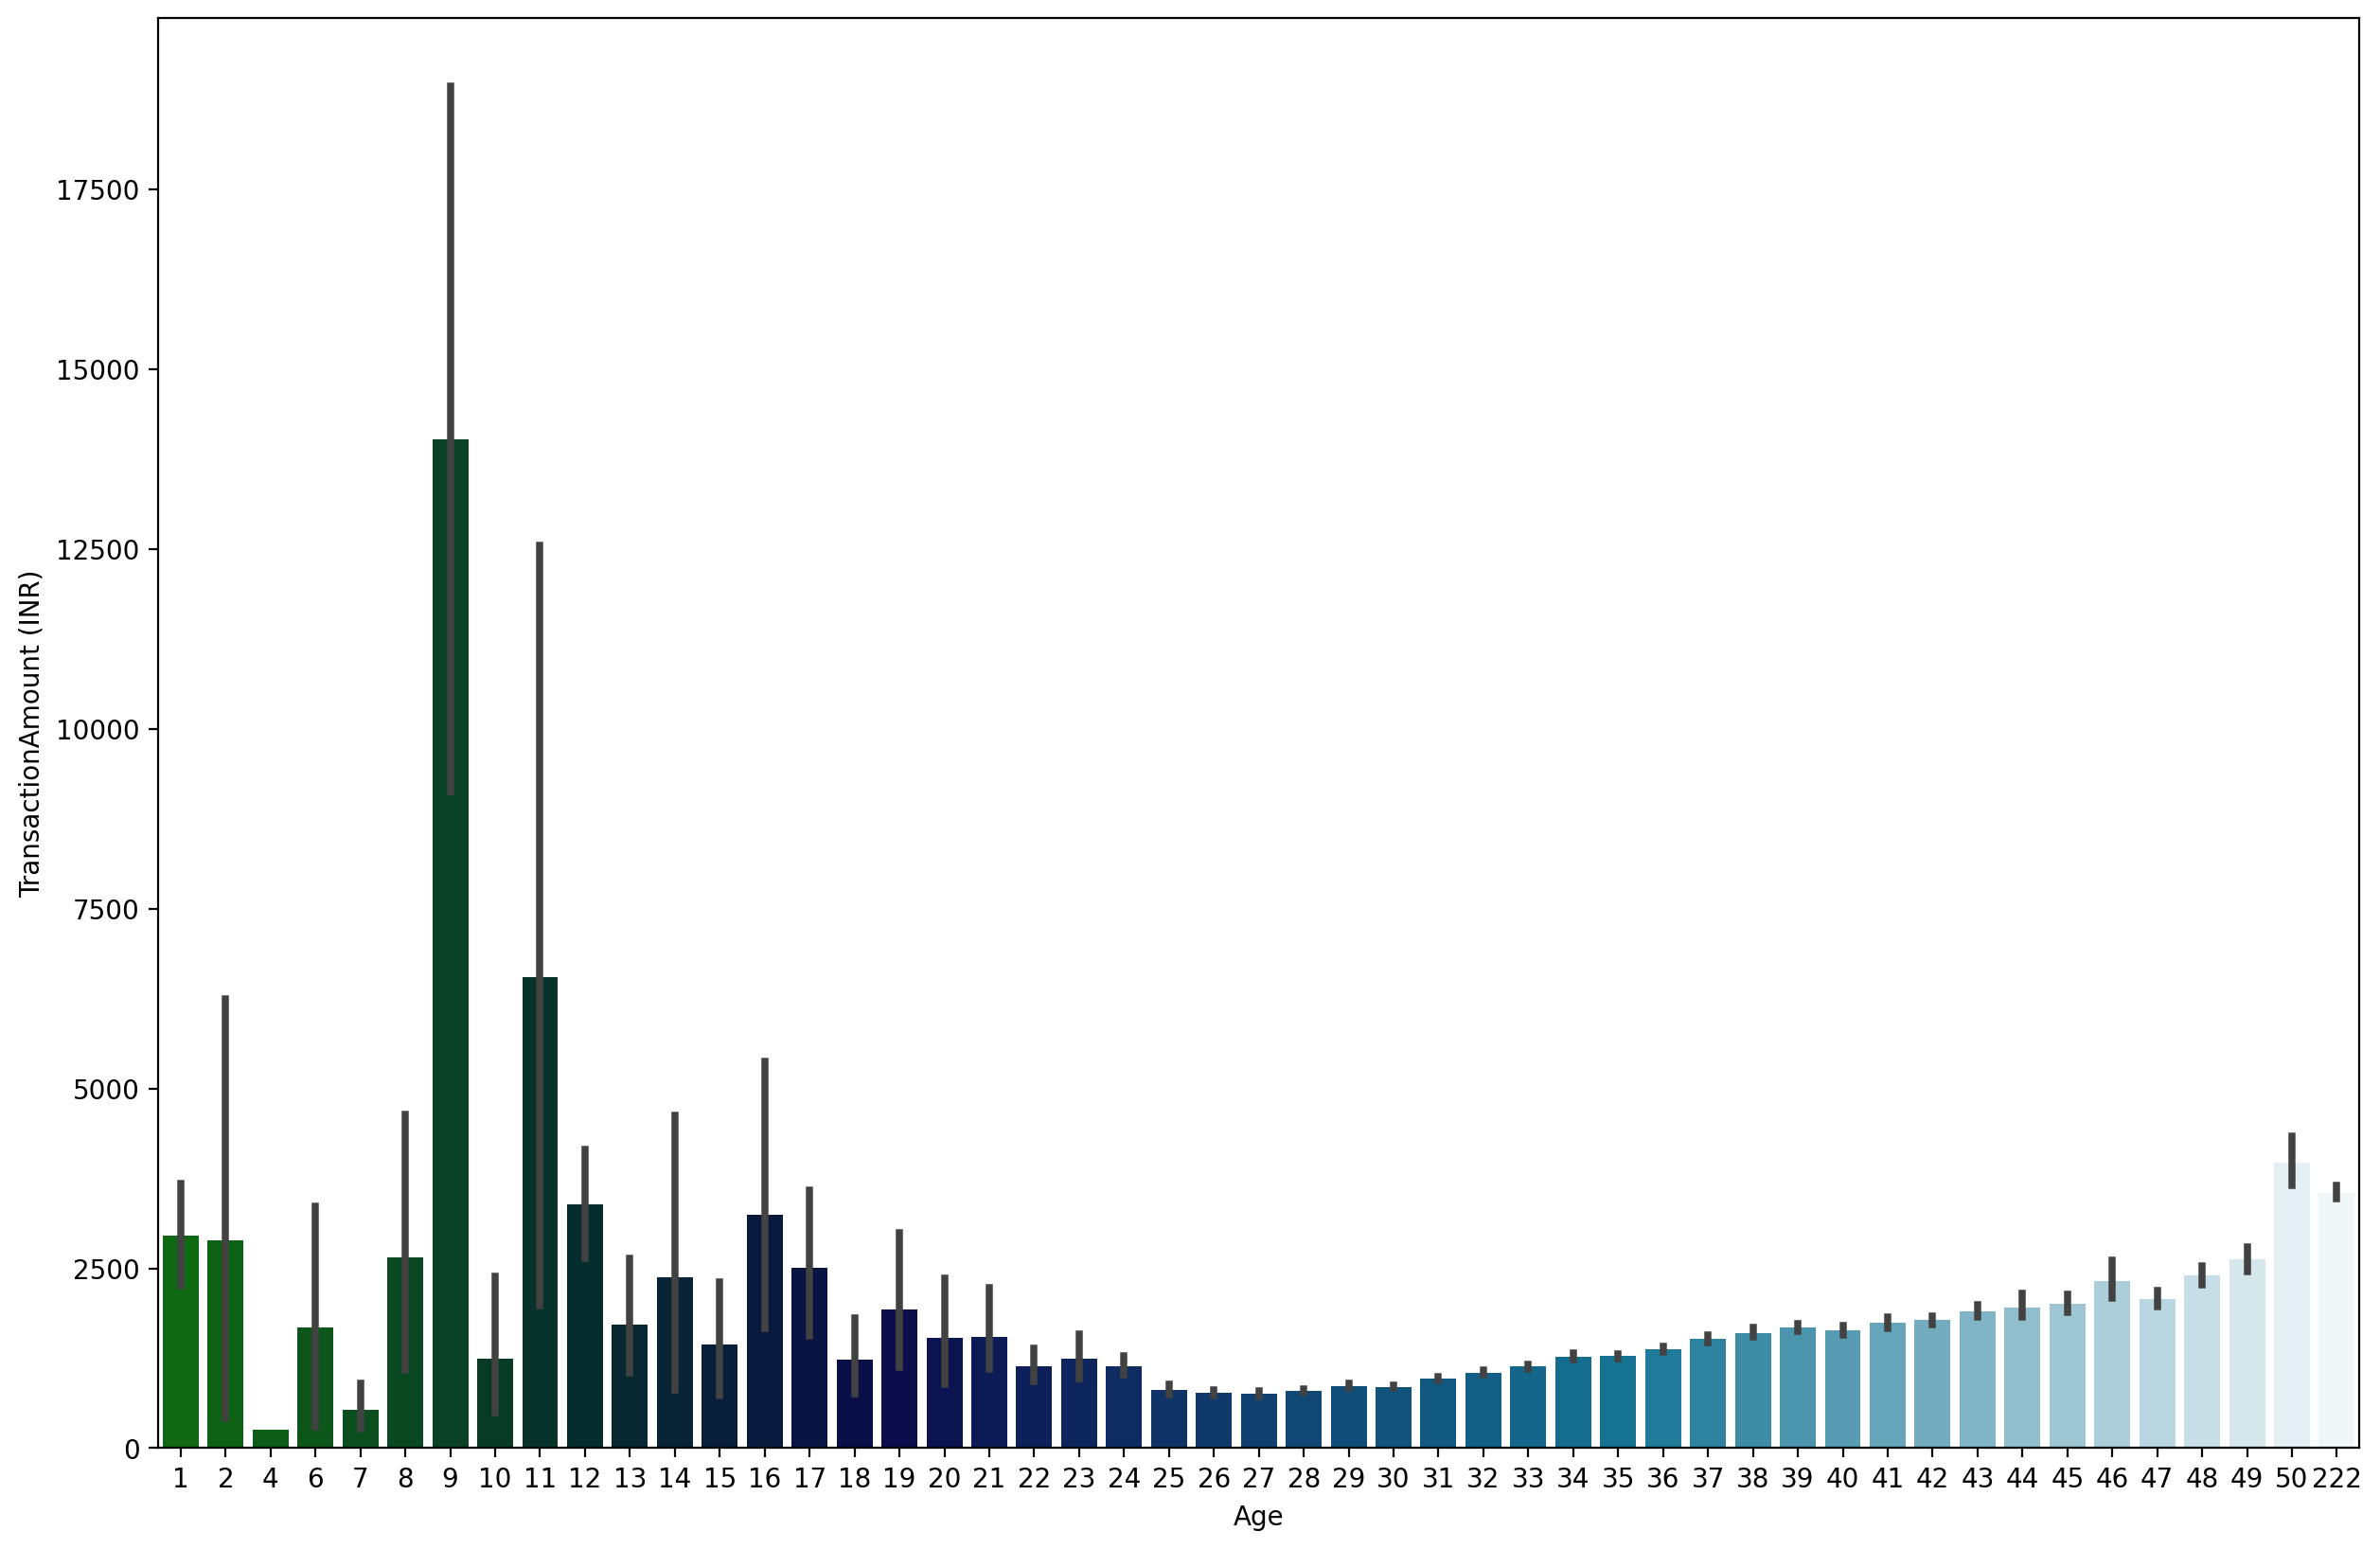

In [43]:
plt.figure(figsize=(15,10),dpi=200)
sns.barplot(data=df,x='Age',y='TransactionAmount (INR)',palette='ocean')

Likewise, an exactly similar trend prevails in case of transaction amounts as well. Younger adult customers, in the age range of 19 to 24 years, perform exorbitant transactions as compared to their surrounding age groups. This is most probably due to the reason that younger adults between the ages of 18 to 24 years have their own career aspirations to fulfil as a consequence of which they generally have lavish and extravagant demands for fulfilling their passions and interests and for facilitating their development through all means. Nevertheless, middle age senior adults and elderly customers make comparatively more extortionate transactions for managing their families and livelihoods.

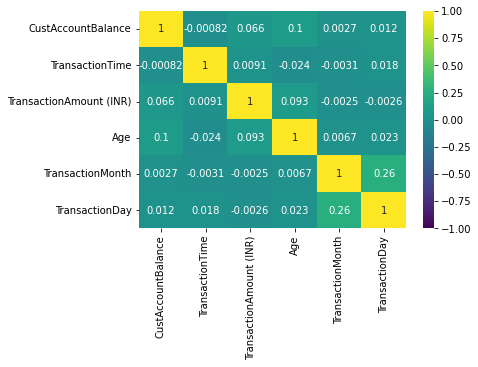

In [44]:
sns.heatmap(df.corr(),annot=True,cmap='viridis',vmin=-1,vmax=1)

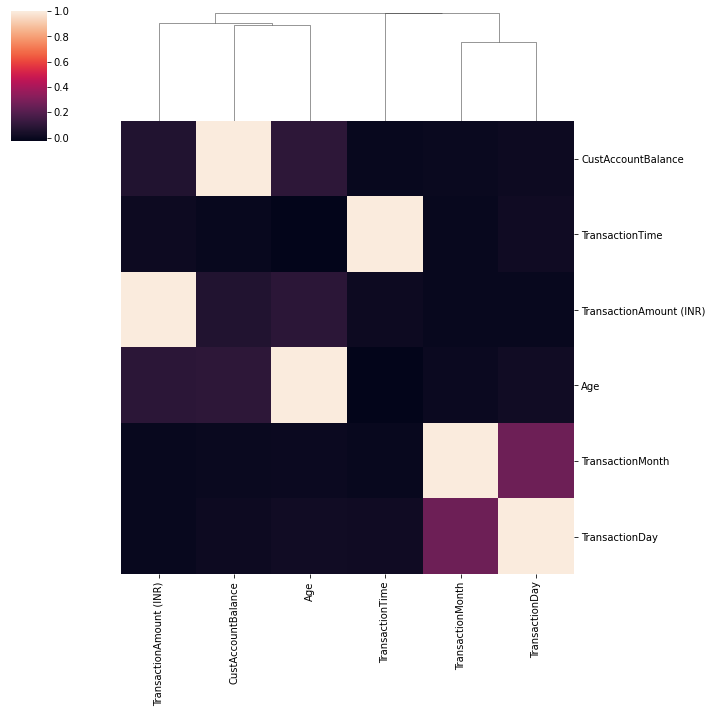

In [45]:
sns.clustermap(df.corr(),row_cluster=False)

Skewness of CustAccountBalance: 36.61795538324552
Kurtosis of CustAccountBalance: 2650.4742083374363
Distribution Plot of CustAccountBalance:


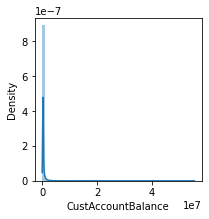

Box Plot of CustAccountBalance:


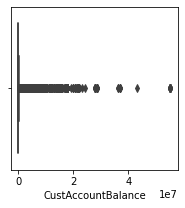

Quantile-Quantile Plot of CustAccountBalance:


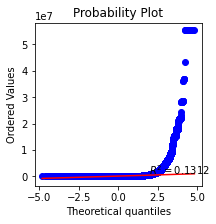

Skewness of TransactionAmount (INR): 54.35309885783315
Kurtosis of TransactionAmount (INR): 8863.538556781345
Distribution Plot of TransactionAmount (INR):


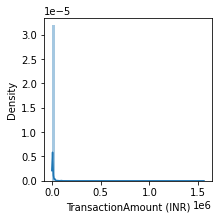

Box Plot of TransactionAmount (INR):


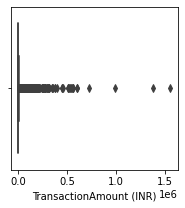

Quantile-Quantile Plot of TransactionAmount (INR):


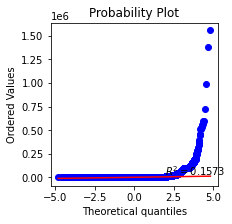

In [49]:
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import probplot
for col in df.columns:
    if df[col].dtypes == np.float64:
        print("Skewness of {}:".format(col),df[col].skew())
        print("Kurtosis of {}:".format(col),df[col].kurt())
        plt.figure(figsize=(3,3))
        print("Distribution Plot of {}:".format(col))
        sns.distplot(df[col])
        plt.show()
        print("Box Plot of {}:".format(col))
        plt.figure(figsize=(3,3))
        sns.boxplot(df[col])
        plt.show()
        print("Quantile-Quantile Plot of {}:".format(col))
        plt.figure(figsize=(3,3))
        probplot(df[col],plot=plt,rvalue=True)
        plt.show()

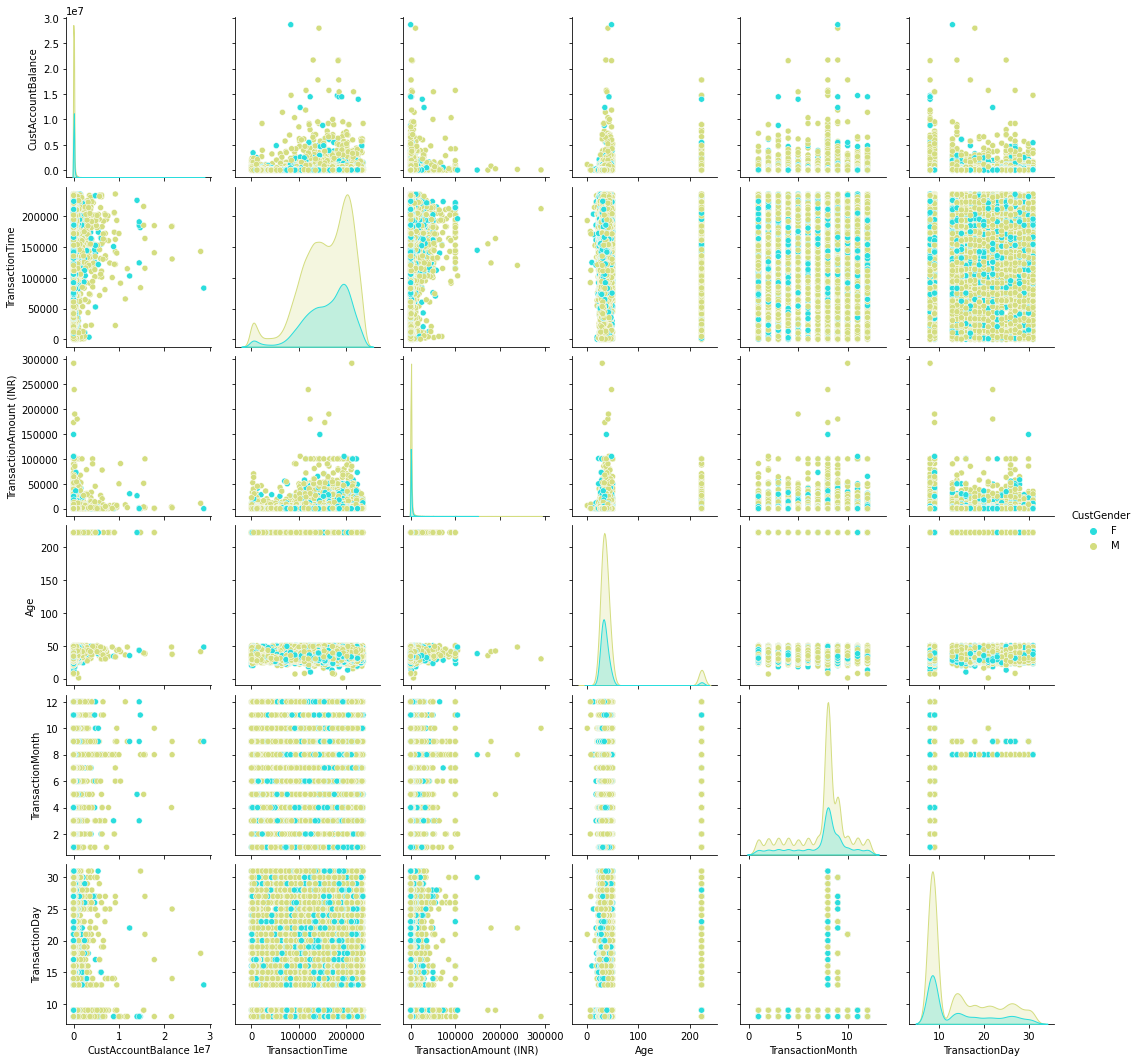

In [50]:
sns.pairplot(df.sample(n=50000),hue='CustGender',palette='rainbow')

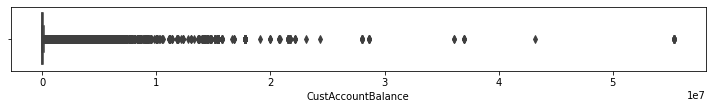

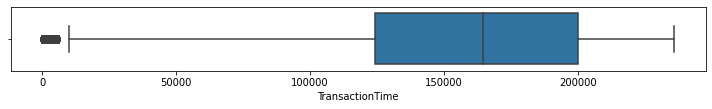

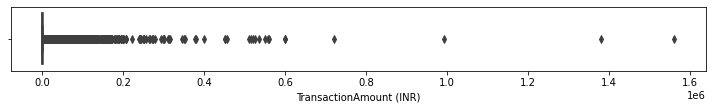

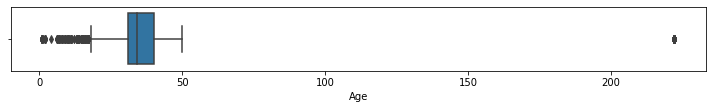

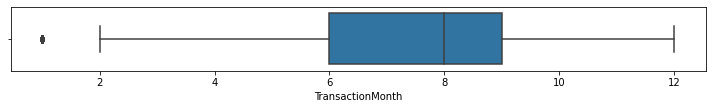

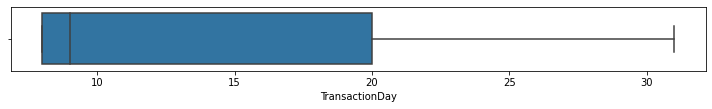

In [51]:
for i, feature in enumerate(df.select_dtypes(include=[np.float64,np.int64]).columns):
    plt.figure(figsize=(10,10))
    plt.subplot(7,1, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(df[feature])
    plt.tight_layout()